In [0]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/kaggle/kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 59.9MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 58.7MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.3MB/s]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [0]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
df_train.shape

(1460, 81)

Data fields
Here's a brief version of what you'll find in the data description file.


1.	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2.	MSSubClass: The building class
3.	MSZoning: The general zoning classification
4.	LotFrontage: Linear feet of street connected to property
5.	LotArea: Lot size in square feet
6.	Street: Type of road access
7.	Alley: Type of alley access
8.	LotShape: General shape of property
9.	LandContour: Flatness of the property
10.	Utilities: Type of utilities available
11.	LotConfig: Lot configuration
12.	LandSlope: Slope of property
13.	Neighborhood: Physical locations within Ames city limits
14.	Condition1: Proximity to main road or railroad
15.	Condition2: Proximity to main road or railroad (if a second is present)
16.	BldgType: Type of dwelling
17.	HouseStyle: Style of dwelling
18.	OverallQual: Overall material and finish quality
19.	OverallCond: Overall condition rating
20.	YearBuilt: Original construction date
21.	YearRemodAdd: Remodel date
22.	RoofStyle: Type of roof
23.	RoofMatl: Roof material
24.	Exterior1st: Exterior covering on house
25.	Exterior2nd: Exterior covering on house (if more than one material)
26.	MasVnrType: Masonry veneer type
27.	MasVnrArea: Masonry veneer area in square feet
28.	ExterQual: Exterior material quality
29.	ExterCond: Present condition of the material on the exterior
30.	Foundation: Type of foundation
31.	BsmtQual: Height of the basement
32.	BsmtCond: General condition of the basement
33.	BsmtExposure: Walkout or garden level basement walls
34.	BsmtFinType1: Quality of basement finished area
35.	BsmtFinSF1: Type 1 finished square feet
36.	BsmtFinType2: Quality of second finished area (if present)
37.	BsmtFinSF2: Type 2 finished square feet
38.	BsmtUnfSF: Unfinished square feet of basement area
39.	TotalBsmtSF: Total square feet of basement area
40.	Heating: Type of heating
41.	HeatingQC: Heating quality and condition
42.	CentralAir: Central air conditioning
43.	Electrical: Electrical system
44.	1stFlrSF: First Floor square feet
45.	2ndFlrSF: Second floor square feet
46.	LowQualFinSF: Low quality finished square feet (all floors)
47.	GrLivArea: Above grade (ground) living area square feet
48.	BsmtFullBath: Basement full bathrooms
49.	BsmtHalfBath: Basement half bathrooms
50.	FullBath: Full bathrooms above grade
51.	HalfBath: Half baths above grade
52.	Bedroom: Number of bedrooms above basement level
53.	Kitchen: Number of kitchens
54.	KitchenQual: Kitchen quality
55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.	Functional: Home functionality rating
57.	Fireplaces: Number of fireplaces
58.	FireplaceQu: Fireplace quality
59.	GarageType: Garage location
60.	GarageYrBlt: Year garage was built
61.	GarageFinish: Interior finish of the garage
62.	GarageCars: Size of garage in car capacity
63.	GarageArea: Size of garage in square feet
64.	GarageQual: Garage quality
65.	GarageCond: Garage condition
66.	PavedDrive: Paved driveway
67.	WoodDeckSF: Wood deck area in square feet
68.	OpenPorchSF: Open porch area in square feet
69.	EnclosedPorch: Enclosed porch area in square feet
70.	3SsnPorch: Three season porch area in square feet
71.	ScreenPorch: Screen porch area in square feet
72.	PoolArea: Pool area in square feet
73.	PoolQC: Pool quality
74.	Fence: Fence quality
75.	MiscFeature: Miscellaneous feature not covered in other categories
76.	MiscVal: $Value of miscellaneous feature
77.	MoSold: Month Sold
78.	YrSold: Year Sold
79.	SaleType: Type of sale
80.	SaleCondition: Condition of sale



In [0]:
# Analyse Sale Price

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

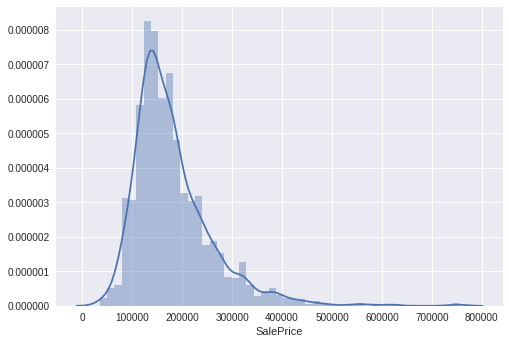

In [0]:
#Polt sale price

sns.distplot(df_train['SalePrice'])

In [0]:
# Check different moments
print("Skewness: %f"% df_train['SalePrice'].skew())
print("Kurtosis: %f"% df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


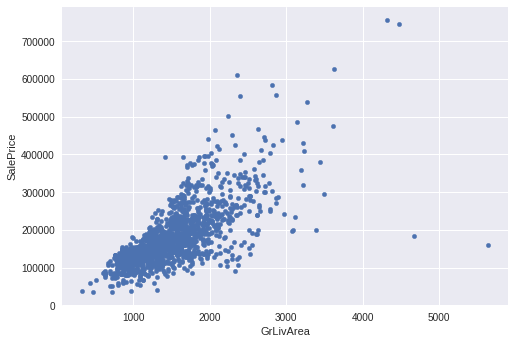

In [0]:
# Graph of grlivarea and sale price
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

Seems like linear graph somewhat.... If one increases other also increases

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


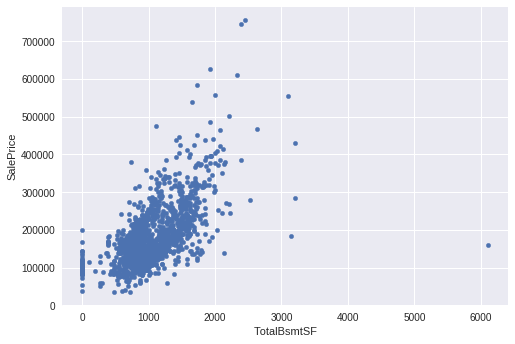

In [0]:
# Graph of totalbsmtsf and sale price

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

This is also linear 

(-0.5, 9.5, 0, 791005.0)

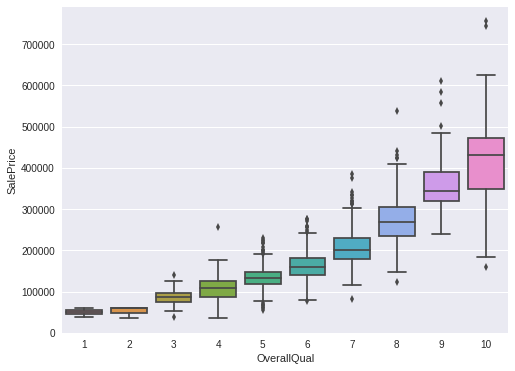

In [0]:
# box plot of overallqual and sale price
var ='OverallQual'

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0)

Seems linear

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

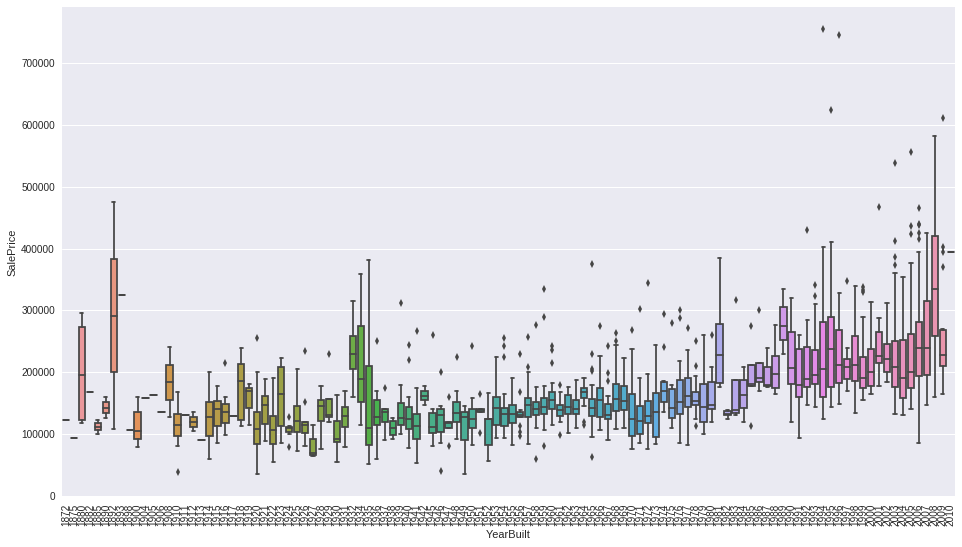

In [0]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16,9))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90)

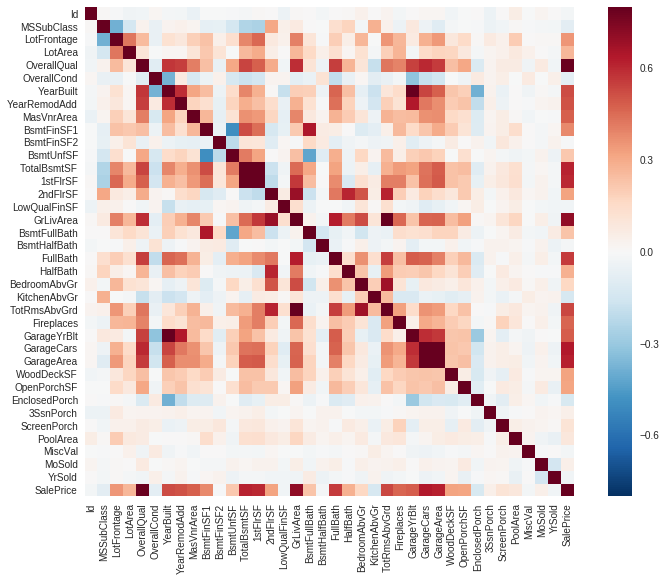

In [0]:
#Check all feature realation using heatmap 

corr_matrix = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

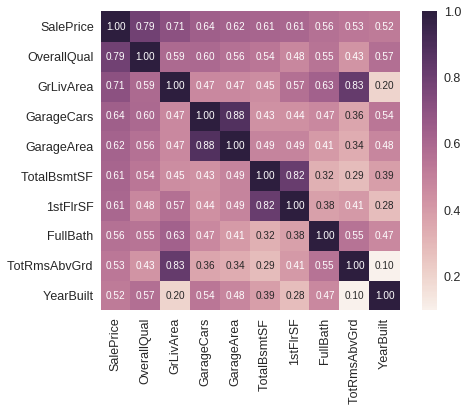

In [0]:
# sale price correlation matrix

k=10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Above are related Fields to sales price

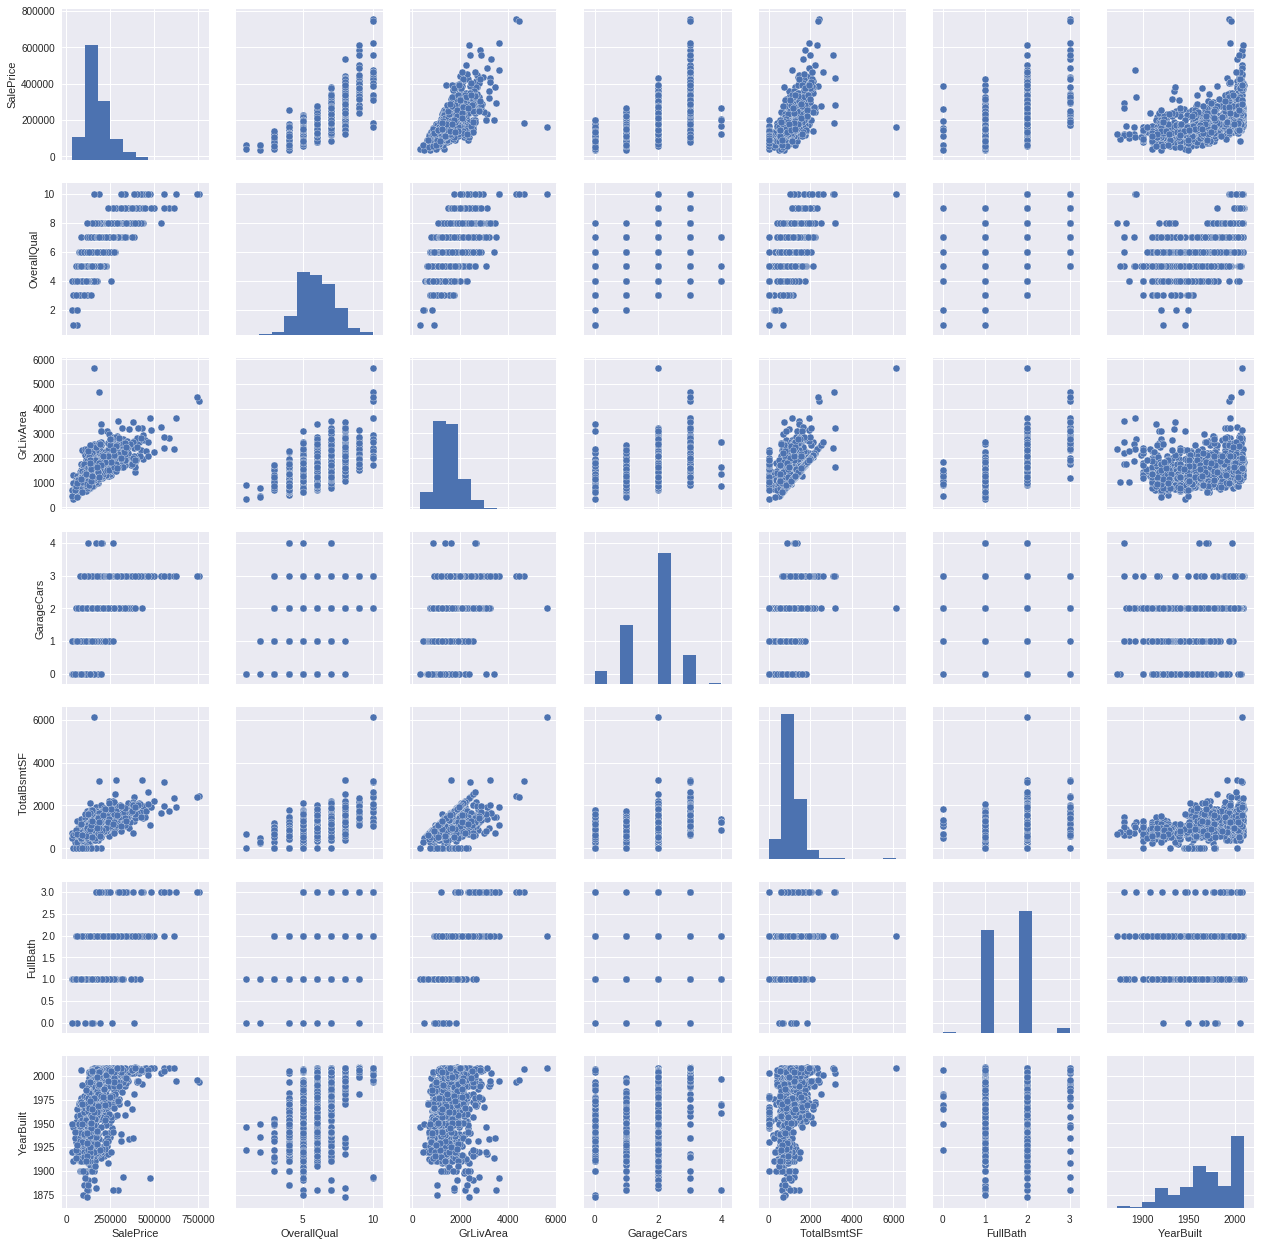

In [0]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

**Check Missing data **

In [0]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent= (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
#delete missing data > 1
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() # is there missing data?


0

Checking outliers using standard deviation

In [0]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range(low) of distribution')
print(low_range)
print('\nouter range(hig) of distribution')
print(high_range)


outer range(low) of distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range(hig) of distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


**Bivariate Analysis**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


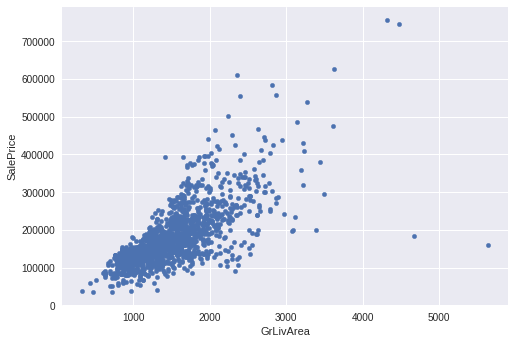

In [0]:
# bivariate analysis 

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [0]:
# Two last values of as per graph are not following the graph So delete them

#deleting points
df_train.sort_values(by='GrLivArea', ascending=False)[:2]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [0]:
#drop them
df_train = df_train.drop(df_train[df_train['Id']==1299].index)
df_train = df_train.drop(df_train[df_train['Id']==524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


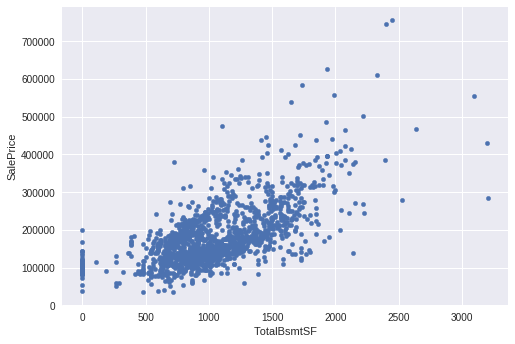

In [0]:
#bivariate analysis saleprice and grlivarea

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice')

**For Bivariate Analysis following should be tested**



1.   Normality
2.   Homoscedasticity 
3.   Linearity
4.   Absence of correlated errors 









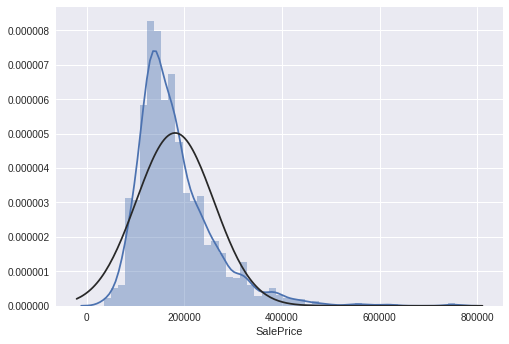

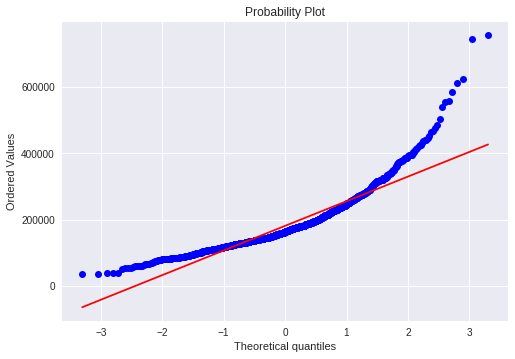

In [0]:
#check normality


sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [0]:
#Apply transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])


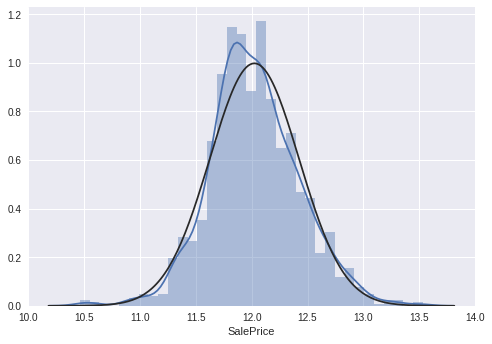

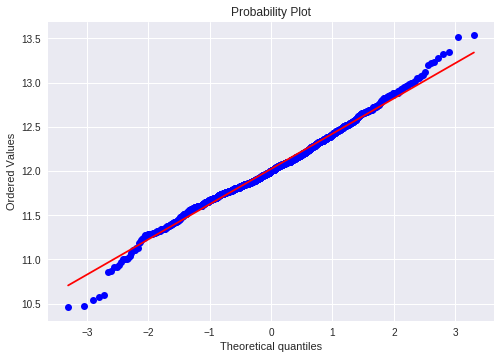

In [0]:
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

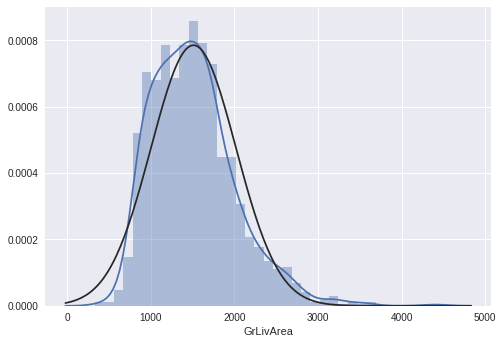

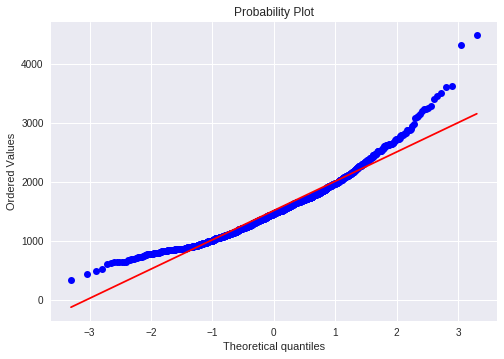

In [0]:
#Check grlivarea

sns.distplot(df_train['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'], plot=plt)

In [0]:
#Apply same method --- Skewness

df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

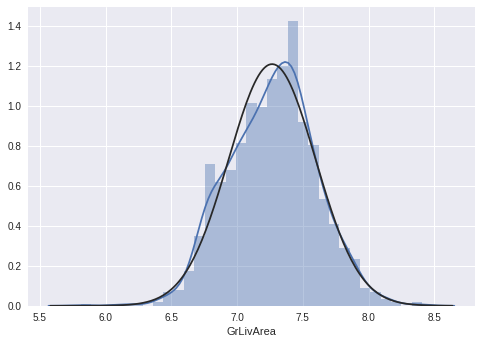

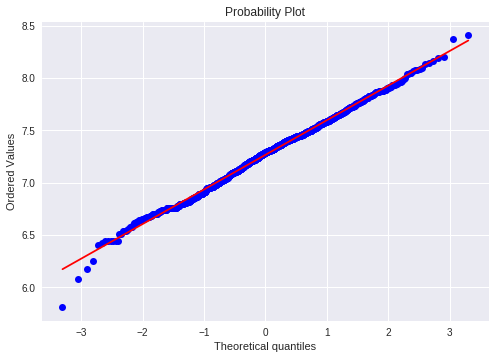

In [0]:
#plot and see
sns.distplot(df_train['GrLivArea'], fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)

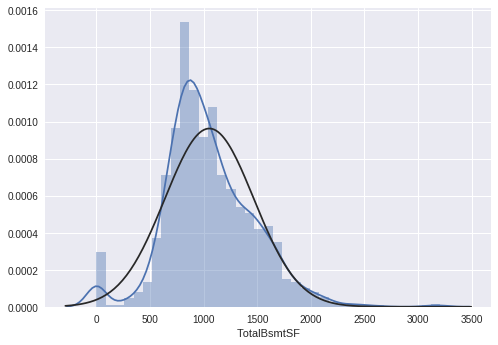

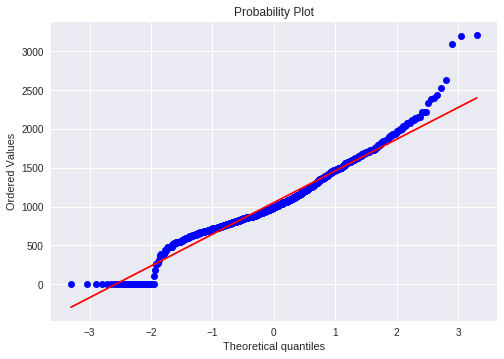

In [0]:
#TotalBsmtSF

sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res=stats.probplot(df_train['TotalBsmtSF'],plot=plt)


In [0]:
# This BsmtSF has 0 values (some houses do not have basements) as seen from graph so we cant apply log transformation
# create a new column which has only binary classification for basements

df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train['HasBsmt'].head()

0    1
1    1
2    1
3    1
4    1
Name: HasBsmt, dtype: int64

In [0]:
#transoform the data now
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

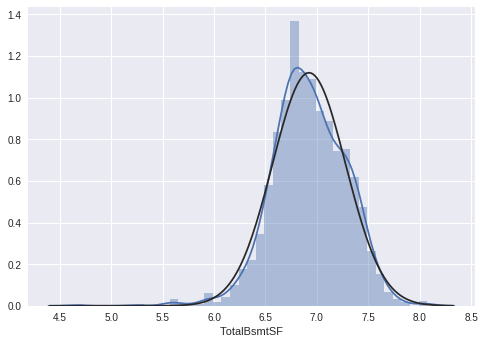

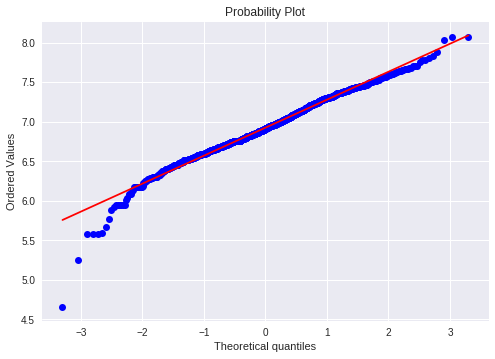

In [0]:
# plot it
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=plt)

checking homoscendasticity

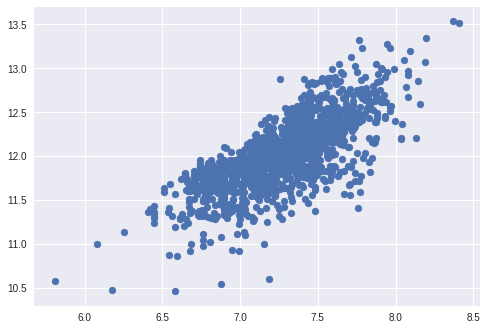

In [0]:
#sale price and grlivarea

plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

Above graph used to be cone shape... now its normally distributed

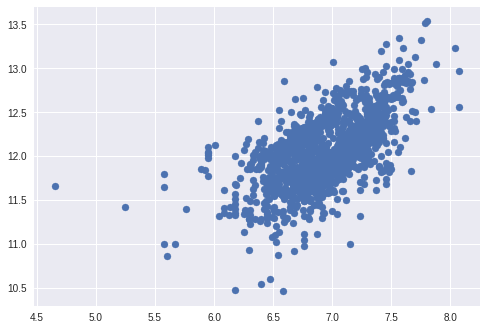

In [0]:
#plot saleprice and totalbsmtsf

plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

In [0]:
#convert categorical variable into dummy

df_train = pd.get_dummies(df_train)


In [0]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


Multivariate Data Analysis is completed

**Lets do Machine learning**

In [0]:
import pandas as pd


df_housing = pd.read_csv("train.csv")
df_housing.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#check columns

df_housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
#drop missing values for now

df_housing = df_housing.dropna(axis=1)

In [0]:
# We will be predicting the Sale price obviously

y = df_housing.SalePrice

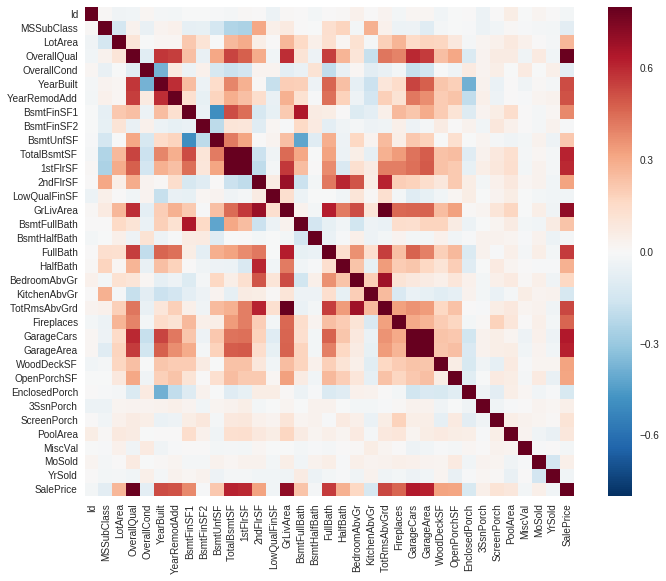

In [0]:
# now select the correlation matrix to get the most probable features

corr_matrix = df_housing.corr()
f, ax = plt.subplots(figsize=(12,9)) 
sns.heatmap(corr_matrix, vmax=.8, square=True)


Observing the graph we can see the following values are related to Sale Price

1. overallqual
2. grlivarea
3. totalbsmtsf =  1stflrSF
4. garagecars =  garagearea

garagecars =  garagearea of course they are equal / highly related because if you have large number of cars you need larger garage area

totalbsmtsf =  1stflrSF because as seen from the graph both seems to share high correlation ie. if one increases other also increase

In [0]:
#select only related values
housing_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

X = df_housing[housing_features]

In [0]:
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea
0,7,1710,856,548
1,6,1262,1262,460
2,7,1786,920,608
3,7,1717,756,642
4,8,2198,1145,836


In [0]:
X.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1057.429452,472.980137
std,1.382997,525.480383,438.705324,213.804841
min,1.000000,334.000000,0.000000,0.000000
25%,5.000000,1129.500000,795.750000,334.500000
50%,6.000000,1464.000000,991.500000,480.000000
75%,7.000000,1776.750000,1298.250000,576.000000
max,10.000000,5642.000000,6110.000000,1418.000000


In [0]:
#Lets transform the OverallQual into some categories

# 10	Very Excellent              category 2
# 9	Excellent                     category 2
# 8	Very Good                     category 2
# 7	Good                          category 2

# 6	Above Average                 category 1
# 5	Average                       category 1
# 4	Below Average                 category 1

# 3	Fair                          category 0
# 2	Poor                          category 0
# 1	Very Poor  --- We cant buy -- category 0

In [0]:
#modify house quality as per our requirement
house_quality = {
    1: 0,
    2: 0,
    3: 0,
    
    4: 1,
    5: 1,
    6: 1,
    
    7: 2,
    8: 2,
    9: 2,
    10:2,
}



In [0]:
X['OverallQual'].replace(house_quality,inplace=True)

In [0]:
X.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea
0,2,1710,856,548
1,1,1262,1262,460
2,2,1786,920,608
3,2,1717,756,642
4,2,2198,1145,836


In [0]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [0]:
#test for test data given

test_df = pd.read_csv('test.csv')
some_test = test_df[:5]
df = some_test[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea' ]]

In [0]:

df['OverallQual'].replace(house_quality,inplace=True)

In [0]:
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea
0,1,896,882.0,730.0
1,1,1329,1329.0,312.0
2,1,1629,928.0,482.0
3,1,1604,926.0,470.0
4,2,1280,1280.0,506.0


In [0]:
dt_model.predict(df.head())

array([123000., 170000., 192000., 181000., 203000.])

In [0]:
some_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
#calculate mean absolute error

from sklearn.metrics import mean_absolute_error

predicted_home_prices = dt_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

342.3004566210045

In [0]:
# Lets split the data and code again

from sklearn.model_selection import train_test_split


train_x, val_x, train_y, val_y = train_test_split(X,y, random_state=0)

#define model

dt_model = DecisionTreeRegressor()
dt_model.fit(train_x, train_y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
val_pred = dt_model.predict(val_x)
mean_absolute_error(val_y, val_pred)

29471.481669928246

Above is very poor model

In [0]:
#lets try different depths for the tree

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
  model.fit(train_x,train_y)
  pred_vals = model.predict(val_x)
  mae = mean_absolute_error(val_y, pred_vals)
  return(mae)

In [0]:
train_x, val_x, train_y, val_y = train_test_split(X,y, random_state=0)

In [0]:
# try different nodes and compare the models

for max_leaf_nodes in [5, 50,500,5000,10000]:
  mod_mae = get_mae(max_leaf_nodes, train_x,val_x,train_y,val_y)
  print("Max leaf nodes: %d \t\t Mean Absolute Error: %d" %(max_leaf_nodes, mod_mae))

Max leaf nodes: 5 		 Mean Absolute Error: 33425
Max leaf nodes: 50 		 Mean Absolute Error: 25352
Max leaf nodes: 500 		 Mean Absolute Error: 27602
Max leaf nodes: 5000 		 Mean Absolute Error: 28546
Max leaf nodes: 10000 		 Mean Absolute Error: 28546


Best option is 50 nodes

In [0]:
#Lets try Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_x,train_y)

pred_house = forest_model.predict(val_x)

print(mean_absolute_error(val_y, pred_house))

25060.542035225048


Somewhat improved model

**Lets try with handeling missing values

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


housing_df = pd.read_csv('train.csv')


house_target = housing_df.SalePrice
house_pred = housing_df.drop(['SalePrice'], axis=1)

numeric_pred_df =  house_pred.select_dtypes(exclude=['object']) #only consider numeric values
# numeric_pred_df = numeric_pred_df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]


# numeric_pred_df['OverallQual'].replace(house_quality,inplace=True)

In [0]:
numeric_pred_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [0]:
#split the data into train test

x_train, x_test, y_train, y_test = train_test_split(numeric_pred_df, house_target, train_size=0.7, test_size=0.3, random_state=0)


#check score
def score_dataset(x_train, x_test, y_train, y_test):
  model = RandomForestRegressor()
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  return mean_absolute_error(y_test, preds)

In [0]:
# model score when missing cols are dropped

cols_missing = [col for col in x_train.columns if x_train[col].isnull().any()]
reduced_x_train = x_train.drop(cols_missing, axis=1)
reduced_x_train = x_test.drop(cols_missing,axis=1)

print("Mean Absolute Error (dropped columns): ")
print(score_dataset(reduced_x_train,reduced_x_train,y_train[:438],y_test)) #since columns are dropped we have to adjust y_train 

Mean Absolute Error (dropped columns): 
67263.0894977169


In [0]:
#impute the missing values and then check the score

from sklearn.impute import SimpleImputer


mu_imputer = SimpleImputer()

imputed_x_train = mu_imputer.fit_transform(x_train)
imputed_x_test = mu_imputer.fit_transform(x_test)

print("Mean Absolute Error (imputed columns):")

print(score_dataset(imputed_x_train,imputed_x_test,y_train,y_test))

Mean Absolute Error (imputed columns):
18768.976255707763


In [0]:
#extra columns showing what was imputed

imputed_x_train_plus = x_train.copy()
imputed_x_test_plus = x_test.copy()

cols_missing = (col for col in x_train.columns if x_train[col].isnull().any())

for col in cols_missing:
  imputed_x_train_plus[col] = imputed_x_train_plus.isnull()
  imputed_x_test_plus[col] = imputed_x_test_plus.isnull()

In [0]:
my_imputer = SimpleImputer()
imputed_x_train_plus = my_imputer.fit_transform(imputed_x_train_plus)
imputed_x_test_plus = my_imputer.fit_transform(imputed_x_test_plus)

print("Mean Absolute Error (tracked imputed columns):")
print(score_dataset(imputed_x_train,imputed_x_test,y_train,y_test))

Mean Absolute Error (tracked imputed columns):
19219.371232876714


In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
target=train_data.SalePrice


#missing values
cols_missing = [col for col in train_data.columns if train_data[col].isnull().any()]

candidate_train_pred = train_data.drop(['Id','SalePrice'] + cols_missing, axis=1)
candidate_test_pred = test_data.drop(['Id'] + cols_missing, axis=1)

In [0]:
# Get the columns as defined

low_cardinality_cols = [cname for cname in candidate_train_pred.columns if candidate_train_pred[cname].nunique()<10 and candidate_train_pred[cname].dtype == "object"]

numeric_cols = [cname for cname in candidate_train_pred.columns if candidate_train_pred[cname].dtype in ['int64','float64']]

my_cols = low_cardinality_cols + numeric_cols


train_pred = candidate_train_pred[my_cols]
test_pred = candidate_test_pred[my_cols]

In [0]:
train_pred.dtypes.sample(10)

ExterCond       object
2ndFlrSF         int64
HouseStyle      object
CentralAir      object
OpenPorchSF      int64
MSSubClass       int64
OverallQual      int64
OverallCond      int64
BsmtHalfBath     int64
MoSold           int64
dtype: object

In [0]:
one_hot_encoded_training_pred = pd.get_dummies(train_pred)
one_hot_encoded_training_pred.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [0]:
# Model

from sklearn.model_selection import cross_val_score

def get_mae(X,y):
  return -1 * cross_val_score(RandomForestRegressor(50),X,y,scoring='neg_mean_absolute_error').mean()


pred_without_categ = train_pred.select_dtypes(exclude='object')

mae_without_categ = get_mae(pred_without_categ,target)

mae_one_hot_encoding = get_mae(one_hot_encoded_training_pred,target)

print("Mean absolute error (dropped category)"+str(int(mae_without_categ)))
print("Mean absolute error (one hot encoding)"+str(int(mae_one_hot_encoding)))


Mean absolute error (dropped category)18284
Mean absolute error (one hot encoding)18253


In [0]:
one_hot_encoding_training_pred = pd.get_dummies(train_pred)
one_hot_encoding_test_pred = pd.get_dummies(test_pred)

final_train, final_test = one_hot_encoding_training_pred.align(one_hot_encoding_test_pred,join='inner', axis=1)

In [0]:
final_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [0]:
#Using XGBoost


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)

y=data.SalePrice
X=data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_x,test_x,train_y,test_y=train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)


# Impute

my_imputer = Imputer()
train_x=my_imputer.fit_transform(train_x)
test_x=my_imputer.fit_transform(test_x)

In [0]:
from xgboost import XGBRegressor

my_model = XGBRegressor()

In [0]:
my_model.fit(train_x,train_y,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
#make predictions

predictions = my_model.predict(test_x)


from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: "+str(mean_absolute_error(predictions,test_y)))

Mean Absolute Error: 15998.155565068493


In [0]:
my_model = XGBRegressor()
my_model.fit(train_x,train_y,early_stopping_rounds=5,eval_set=[(test_x,test_y)],verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
my_model= XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_x,train_y,early_stopping_rounds=5,eval_set=[(test_x,test_y)],verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)